In [1]:
!pip install --upgrade torch torchvision einops


In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from einops import rearrange
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# Step 1: Download the MNIST dataset and create a subset of 1000 samples
transform = transforms.Compose([transforms.ToTensor()])
mnist_dataset = torchvision.datasets.MNIST(root="./data", train=True, download=True, transform=transform)

# Select a subset of 1000 samples
subset_size = 1000
subset_indices = torch.randperm(len(mnist_dataset))[:subset_size]
subset = [mnist_dataset[i] for i in subset_indices]
images, labels = zip(*subset)
images = torch.stack(images).squeeze(1)  # Shape: [1000, 28, 28]
labels = torch.tensor(labels)



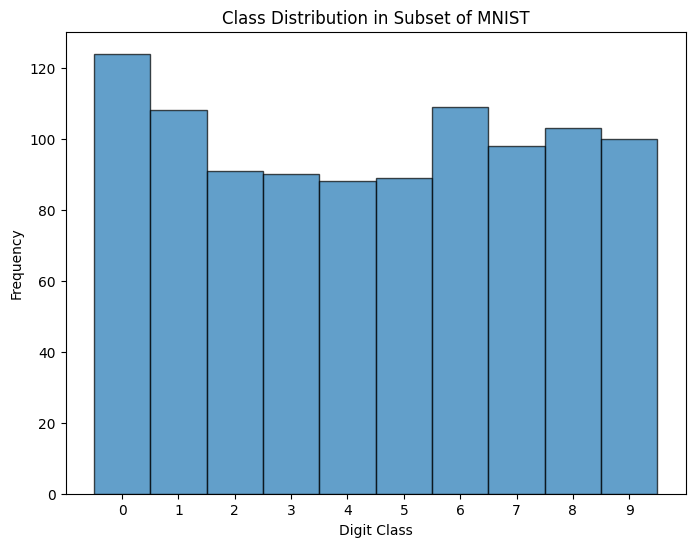

In [4]:
# Step 2: Plot a histogram of classes in the subset
plt.figure(figsize=(8, 6))
plt.hist(labels.numpy(), bins=np.arange(11)-0.5, edgecolor='black', alpha=0.7)
plt.xticks(range(10))
plt.xlabel("Digit Class")
plt.ylabel("Frequency")
plt.title("Class Distribution in Subset of MNIST")
plt.show()




In [5]:
# Step 3: Batch the subset using einops (Batch size = 25)
batch_size = 25
num_batches = subset_size // batch_size
batched_images = rearrange(images[:num_batches * batch_size], '(b s) h w -> b s 1 h w', b=num_batches, s=batch_size)
print(f"Batched dataset shape: {batched_images.shape}")  # Should be [40, 25, 1, 28, 28]



Batched dataset shape: torch.Size([40, 25, 1, 28, 28])


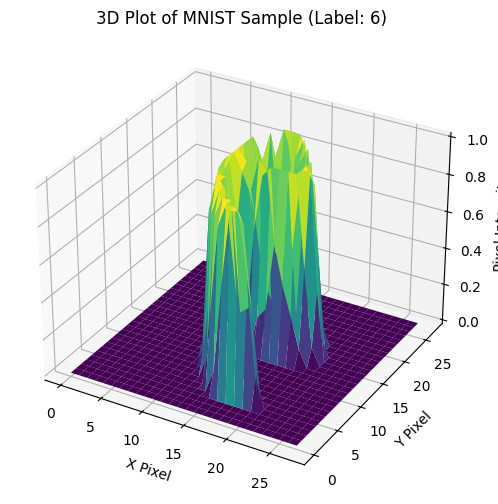

In [13]:
# Step 4: 3D Plot of a randomly selected image
random_idx = np.random.randint(0, subset_size)
selected_image = images[random_idx]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
x = np.arange(28)
y = np.arange(28)
x, y = np.meshgrid(x, y)
z = selected_image.numpy()

ax.plot_surface(x, y, z, cmap='viridis')
ax.set_xlabel('X Pixel')
ax.set_ylabel('Y Pixel')
ax.set_zlabel('Pixel Intensity')
ax.set_title(f'3D Plot of MNIST Sample (Label: {labels[random_idx].item()})')
plt.show()